In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import chi2,chisquare

In [35]:
### COPIADO DEL EJERCICIO 2

def GCL_con_rango(n,Xo,incremento, modulo, multiplicador):
    """Recibe como parametro cinco enteros, numero de iteraciones n, semilla Xo,
    , incremnto, modulo y multiplicador. 
    Los numeros random generados estan entre 0 y 1.
    Imprime el valor de cada iteracion"""
    resultados = [Xo]
    for i in range(n):
        resultados.append(((resultados[i]*multiplicador + incremento) % modulo))  
    resultados.pop(0)
    for i in range(n):
        resultados[i] = resultados[i]/modulo   
    return resultados

def simular_dado(Xo):
    resultado_dado=GCL_con_rango(10,Xo,1664525, 2**32, 1013904223)[0]
    if ( 0<resultado_dado<=1/6 ):
        resultado_dado=1
    elif ( 1/6<resultado_dado<=2/6 ):
        resultado_dado=2
    elif ( 2/6<resultado_dado<=3/6 ):
        resultado_dado=3
    elif ( 3/6<resultado_dado<=4/6 ):
        resultado_dado=4
    elif ( 4/6<resultado_dado<=5/6 ):
        resultado_dado=5
    else:
        resultado_dado=6
    return resultado_dado


def simular_dados(n):
    tiradas=[]
    for i in range(1,n+1):
        tiradas.append((simular_dado(int(random.randrange(1000))),simular_dado(int(random.randrange(1000)))))
    return tiradas




print("Ejercicio 2 - Item A")
print("El espacio muestral es S={2,3,4,5,6,7,8,9,10,11,12}")
print("#############################################")
print("Ejercicio 2 - Item B")
print(simular_dados(10))
print("#############################################")
print("Ejercicio 1 - Item C")

Ejercicio 2 - Item A
El espacio muestral es S={2,3,4,5,6,7,8,9,10,11,12}
#############################################
Ejercicio 2 - Item B
[(3, 6), (5, 6), (3, 1), (5, 5), (2, 3), (4, 2), (5, 5), (2, 2), (4, 6), (2, 4)]
#############################################
Ejercicio 1 - Item C


In [36]:
N = int(1e5)
tiradas = list(map(lambda x: x[0]+x[1], simular_dados(N)))
tiradas

[7,
 5,
 6,
 8,
 6,
 7,
 11,
 7,
 6,
 6,
 5,
 6,
 9,
 5,
 7,
 3,
 5,
 6,
 8,
 9,
 6,
 6,
 3,
 12,
 7,
 9,
 9,
 9,
 10,
 6,
 9,
 6,
 6,
 6,
 6,
 5,
 7,
 9,
 8,
 4,
 4,
 11,
 5,
 8,
 11,
 4,
 6,
 3,
 8,
 6,
 9,
 4,
 7,
 11,
 12,
 5,
 7,
 5,
 4,
 7,
 5,
 7,
 8,
 4,
 7,
 7,
 10,
 3,
 4,
 10,
 9,
 4,
 12,
 11,
 7,
 8,
 7,
 9,
 9,
 8,
 9,
 9,
 8,
 8,
 6,
 8,
 3,
 2,
 8,
 4,
 8,
 12,
 6,
 9,
 10,
 9,
 8,
 7,
 10,
 8,
 5,
 4,
 6,
 8,
 7,
 2,
 9,
 5,
 9,
 10,
 9,
 3,
 8,
 8,
 7,
 9,
 8,
 4,
 7,
 7,
 9,
 10,
 11,
 6,
 8,
 5,
 9,
 4,
 9,
 8,
 7,
 9,
 6,
 7,
 2,
 7,
 9,
 5,
 8,
 7,
 8,
 8,
 7,
 7,
 8,
 4,
 7,
 5,
 2,
 9,
 11,
 5,
 10,
 7,
 8,
 8,
 5,
 6,
 10,
 11,
 6,
 12,
 11,
 7,
 3,
 4,
 8,
 5,
 10,
 9,
 3,
 7,
 4,
 3,
 8,
 4,
 7,
 6,
 5,
 6,
 11,
 7,
 7,
 7,
 5,
 3,
 7,
 2,
 7,
 6,
 8,
 5,
 7,
 7,
 4,
 6,
 5,
 6,
 3,
 12,
 10,
 11,
 5,
 11,
 7,
 6,
 11,
 3,
 10,
 12,
 6,
 8,
 11,
 8,
 5,
 5,
 6,
 4,
 8,
 4,
 8,
 7,
 7,
 8,
 7,
 7,
 9,
 5,
 12,
 10,
 4,
 5,
 11,
 5,
 4,
 4,
 8,
 8,
 8,
 5,
 4,


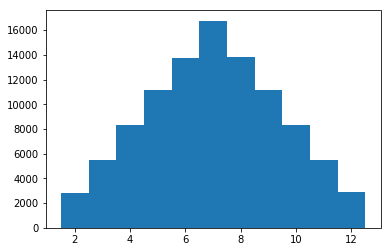

In [37]:
bins = np.arange(1.5,13.5,1)
hist = plt.hist(tiradas,bins=bins)

Las frecuencias normalizadas que se desearían para cada posible valor de una tirada están la siguiente tabla

<img src="./dados.jpg" style="width:500px"/>

Se tiene la fórmula para el test:

$$
    D^2 = \sum_{s=1}^k \frac{ (Y_s - n p_s )^2}{n p_s} \\
    Y_s :\text{Frecuencia observada}, \quad n p_s: \text{ Frecuencia esperada }, \quad k: \text{clases,buckets,etc}
$$

y nos plantean tomar un nivel de significación de 1% es decir, $\alpha = 0.01$

In [38]:
# Esta función calcula el estadístico D2
# f_obs: frecuencias observadas, f_teo: frecuencias esperadas o deseadas (frecuencias sin normalizar)
def d2(f_obs,f_teo):
    d2 = 0
    for i in range(0,len(f_obs)):
        d2+= (f_obs[i] - f_teo[i])**2 / f_teo[i]
    return d2

In [39]:
f_teo = np.array([1,2,3,4,5,6,5,4,3,2,1])/36 * len(tiradas)
f_obs = hist[0]
f_obs

array([ 2804.,  5501.,  8324., 11177., 13744., 16761., 13862., 11138.,
        8282.,  5501.,  2906.])

In [40]:
chisquare(f_obs,f_teo)

Power_divergenceResult(statistic=10.11767, pvalue=0.4302311028512021)

El test de $\chi^2$ nos devolvió un estadístico $D^2=12.553208$ que se corresponde con el valor P: <br>
$$
    P = 0.2497 > \alpha = 0.01 \\
    \implies \text{La distribución es aceptada}
$$


Para cambiar el resultado del test de hipótesis deberíamos tomar un valor de significación mayor al valor P obtenido, por ejemplo $\alpha = 0.25$